## TITLE

In [9]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
set.seed(1234)

### Introduction:



Heart disease is a globally prevalent health issue that affects the heart and blood vessels. According to the CDC, one person dies every 33 seconds from heart disease in the United States. The syptoms of heart disease include shortness of breath, exhaustion and chest pains. Though there is no definite cure for heart disease, it is crucial to identify whether an individual may be affected as it can be fatal. Once fully diagnosed, it is possible to alleviate symptoms and prevent the condition from worsening via lifestyle changes and medications. The question we will be answering is: Can we predict the severity of heart disease in a patient based on health measurments taken in the hospital? The severity of the disease can be classified as 0, 1, 2, 3 and 4 where 0 refers to the absence of the disease and 4 is the highest level of severity. We will be using the “Heart Disease” dataset from the UC Irvine Machine Learning Repository website which provides health and lifestyle characteristics of patients, as well as whether the patient is diagnosed with heart disease. 

**Predictive Question**: Can we predict the severity of heart disease in a patient based on health measurments taken in the hospital?




### Preliminary Exploratory Data Analysis:

In [10]:
#code here

#open and read the dataset

#Clean + wrangle the data into a tidy format

#using only TRAINING DATA, sumarize the data in at least one table(exploratory data analysis). 
#  an example of a useful table could be one that reports the number of observations in each class, the means of the
#  predictor variables you plan to use in your analysis and how many rows have missing data


#using only TRAINING DATA, visualize the data with at least one plot relevant to the analysis you plan to do(exploratory data analysis)
#  an example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan  
#  to use in your data analysis.


In [11]:
#Reading the data from Github

#URl of the raw clevland.data file 
url <- "https://raw.githubusercontent.com/sachit-sharma/dsci-100-group-project-group53/main/processed.cleveland.data"
column_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldspeak", "slope", "ca", "thal", "num")

heart_disease_data <- read_csv(url, col_names = column_names) |>
                       mutate (sex = as.factor(sex), 
                              thal = as.factor(thal), 
                              num = as_factor(num), 
                              cp = as_factor(cp), 
                              fbs = as_factor(fbs), 
                              restecg = as_factor(restecg), 
                              exang = as_factor(exang), 
                              ca = as_factor(ca)) |>
                             rename(class = num)

#Splitting the data into training and testing
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = class)

heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldspe...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
#Calculating the mean value of the predictors 

heart_disease_select <-  heart_disease_train |>
                         select(age, trestbps, chol, thalach)
mean_values <- heart_disease_select |>
               map_df(mean)
mean_values

age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
55.0708,133.1239,247.2655,149.8584


In [13]:
#Calculating the max of the predictors 

max_obs <-  heart_disease_select |>
            map_df(max)

max_obs

age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
77,192,564,195


In [14]:
#Calculating the min of the predictors 
min_obs <- heart_disease_select |>
           map_df(min)

min_obs

age,trestbps,chol,thalach
<dbl>,<dbl>,<dbl>,<dbl>
35,100,126,88


In [15]:

#Calculating the distribution of classes 

class_pct <- heart_disease_train |> 
             group_by(class) |>
             summarize(percentage = n()*100/nrow(heart_disease_train))
class_pct 

class,percentage
<fct>,<dbl>
0,54.424779
1,17.699115
2,11.504425
3,11.061947
4,5.309735


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



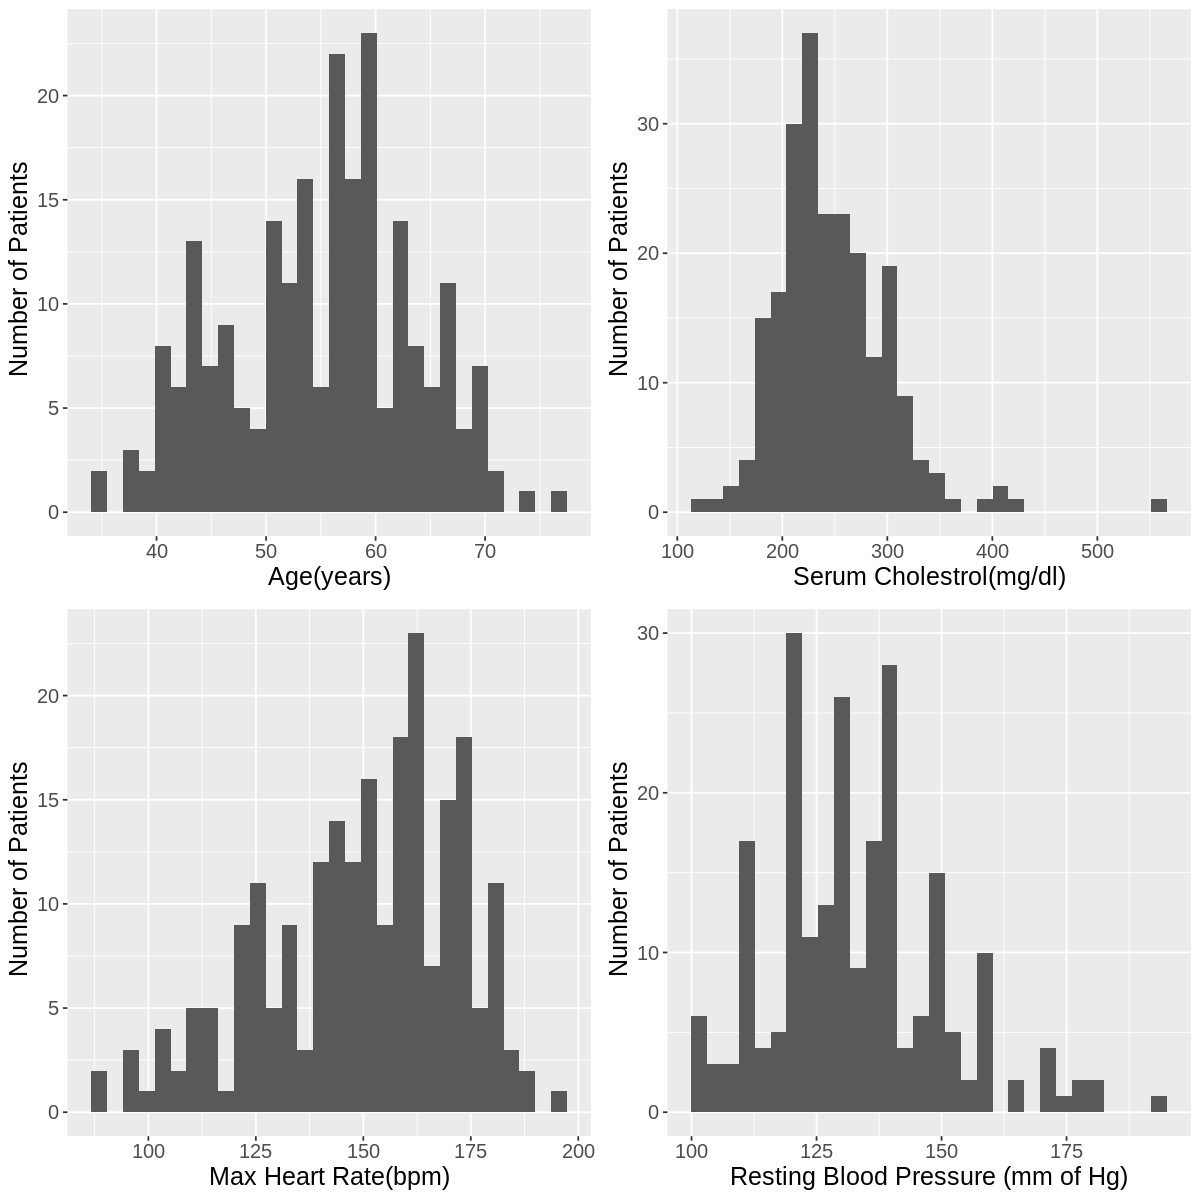

In [18]:
options(repr.plot.width = 10, repr.plot.height = 10)

age_hist <- ggplot(heart_disease_train, 
                      aes(x = age)) +
  geom_histogram() +
  labs(x = "Age(years)", 
       y = " Number of Patients") +
  theme(text = element_text(size = 15))

chol_hist <- ggplot(heart_disease_train, 
                      aes(x = chol)) +
  geom_histogram() +
  labs(x = "Serum Cholestrol(mg/dl)", 
       y = " Number of Patients") +
  theme(text = element_text(size = 15))

thalach_hist <- ggplot(heart_disease_train, 
                      aes(x = thalach)) +
  geom_histogram() +
  labs(x = "Max Heart Rate(bpm)", 
       y = " Number of Patients") +
  theme(text = element_text(size = 15))

bp_hist <- ggplot(heart_disease_train, 
                      aes(x = trestbps)) +
  geom_histogram() +
  labs(x = "Resting Blood Pressure (mm of Hg)", 
       y = " Number of Patients") +
  theme(text = element_text(size = 15))

plot_grid(age_hist,chol_hist,thalach_hist,bp_hist)

### Methods:

### Expected Outcomes and Significance:

We expect to be able to predict the different levels of heart disease in an individual based on their physical health. We predict age, level of cholesterol, and resting blood pressure will have a strong positive correlation to heart disease. Additionally, the maximum achievable heart rate will be negatively correlated with heart disease. These findings can aid in determining who may be at a higher risk of developing heart disease along with aiding in the development of treatment and prevention care for heart disease. Ultimately with these findings, we can ask questions such as how we can promote prevention and care for individuals with a higher risk for heart disease. 
